In [103]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wrangle

In [104]:
#Using my wrangle.py module, the function new_zillow_data brings in a df that contains:
#bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount and fips
#for singlefamily homes in 2017 only.
#this dataframe is located in the Codeup SQL database.

df = wrangle.new_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [105]:
df.shape

(2152863, 7)

In [106]:
df.info()
#Looking at this info, the fips code column should not be a float. Also, FIPS codes should all begin with a leading zero.
#Year built also should not be float value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [107]:
# Find the total number of Null values in each column of our DataFrame.

df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [108]:
df.isnull().any()

bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [109]:
df.columns[df.isnull().any()]

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

In [110]:
# Since less than 1% of rows have null values, we can drop the rows.
# Drop all rows with any Null values, assign to df, and verify.

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [111]:
1 - (2140235 / 2152863)

0.0058656774722776195

In [112]:
#Check df
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [113]:
df.fips.value_counts()

6037.0    1425207
6059.0     552057
6111.0     162971
Name: fips, dtype: int64

In [114]:
#Convert the FIPS column datatype, and replace the values to represent accurate FIPS codes including leading zeros. 

In [115]:
#According to FIPS codes, 06037 is Los Angeles County, 06059 is Orange County, and 06111 is Ventura County
#It may make the most sense to convert this column into three separate columns each representing one county?? 

In [116]:
df.bedroomcnt.value_counts()

3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64

In [117]:
df.bathroomcnt.value_counts()

2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
14.50         1
32.00         1
19.50         1
19.00         1
Name: bathroomcnt, dtype: int64

In [118]:
#Change the year and fips columns to object since they are not numbers to be calculated, and the calculatedsquarefeet column to integer since it is not necessary to show partial sqft
df = df.astype({"yearbuilt": int, "fips": object, "calculatedfinishedsquarefeet": int})

df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt               float64
yearbuilt                         int64
taxamount                       float64
fips                             object
dtype: object

In [119]:
# Create dummy columns for fips since each code represents a county

dummy_df = pd.get_dummies(df[['fips']], dummy_na=False)
dummy_df.head()

,fips_6037.0,fips_6059.0,fips_6111.0
4,1,0,0
6,1,0,0
7,1,0,0
11,1,0,0
14,1,0,0


In [120]:
#concat on to the original df

df = pd.concat([df, dummy_df], axis=1)
df.head(1)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,fips_6037.0,fips_6059.0,fips_6111.0
4,4.0,2.0,3633,296425.0,2005,6941.39,6037.0,1,0,0


In [121]:
#drop the fips column after visualization
#df = df.drop(columns='fips')
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,fips_6037.0,fips_6059.0,fips_6111.0
4,4.0,2.0,3633,296425.0,2005,6941.39,6037.0,1,0,0
6,3.0,4.0,1620,847770.0,2011,10244.94,6037.0,1,0,0
7,3.0,2.0,2077,646760.0,1926,7924.68,6037.0,1,0,0
11,0.0,0.0,1200,5328.0,1972,91.60,6037.0,1,0,0
14,0.0,0.0,171,6920.0,1973,255.17,6037.0,1,0,0


In [133]:
#Change the column names to be the county names 
#According to FIPS codes, 06037 is Los Angeles County, 06059 is Orange County, and 06111 is Ventura County
#Rename columns for better readability and simplicity

df = df.rename(columns={"fips_6037.0": "la_county", "fips_6059.0": "orange_county", "fips_6111.0": "ventura_county", "bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "total_sqft", "taxvaluedollarcnt": "tax_value", "yearbuilt": "year_built"})
df.head()

,bedrooms,bathrooms,total_sqft,tax_value,year_built,taxamount,fips,la_county,orange_county,ventura_county
4,4.0,2.0,3633,296425.0,2005,6941.39,6037.0,1,0,0
6,3.0,4.0,1620,847770.0,2011,10244.94,6037.0,1,0,0
7,3.0,2.0,2077,646760.0,1926,7924.68,6037.0,1,0,0
11,0.0,0.0,1200,5328.0,1972,91.60,6037.0,1,0,0
14,0.0,0.0,171,6920.0,1973,255.17,6037.0,1,0,0


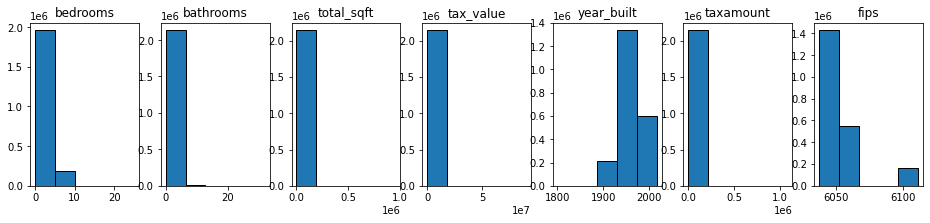

In [134]:
#vizualize the data so that we can get a better sense of how to handle values like outliers, if any.

plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'total_sqft', 'tax_value', 'year_built', 'taxamount', 'fips']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=5, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)



In [ ]:
#just by visually peeking at the data here are my takeaways:
# -most homes have fewer than 5 bedrooms
# -most homes have fewer than 5 bathrooms
# -most homes have smaller sqft than larger sqft
# -most homes tax_value is lower than higher
# -most homes are built after 1933(?est)
# -most homes have low tax_amount than high
# -most homes are in la_county

In [135]:
#Handle outliers to see if shape of data changes at all
#Using John Salas function:

def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df


In [136]:
k = 1.5
col_list = ['bedrooms', 'bathrooms', 'total_sqft', 'tax_value', 'taxamount', 'year_built']

df = remove_outliers(df, k, col_list)
df.head()

,bedrooms,bathrooms,total_sqft,tax_value,year_built,taxamount,fips,la_county,orange_county,ventura_county
7,3.0,2.0,2077,646760.0,1926,7924.68,6037.0,1,0,0
18,3.0,1.0,1244,169471.0,1950,2532.88,6037.0,1,0,0
19,3.0,2.0,1300,233266.0,1950,3110.99,6037.0,1,0,0
20,3.0,2.0,1222,290492.0,1951,3870.25,6037.0,1,0,0
40,2.0,1.0,725,37548.0,1953,576.47,6037.0,1,0,0


In [139]:
#just double checking to make sure the function didn't create any null values.
df.isnull().sum()

bedrooms          0
bathrooms         0
total_sqft        0
tax_value         0
year_built        0
taxamount         0
fips              0
la_county         0
orange_county     0
ventura_county    0
dtype: int64

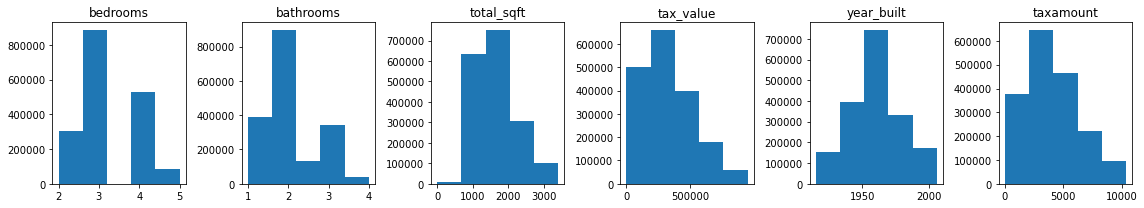

In [141]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'la_county', 'orange_county', 'ventura_county']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
    # mitigate overlap
    plt.tight_layout()
    
plt.show()

In [142]:
#takeaways after eliminating the outliers:

# - bedrooms have an odd distribution: would be normal except for the big gap between 3 and 4. 
# - bathrooms are not normally distributed
# - total_sqft and tax_value have a similar shape. this could be important later.
# - year_built appears normally distributed
# - tax_amount is not quite normal, but more normal than total_sqft and tax_value

